# Problem Statement

**Business Context**

Paisabazaar is a financial services company that assists customers in finding and applying for various banking and credit products. An integral part of their service is assessing the creditworthiness of individuals, which is crucial for both loan approval and risk management. The credit score of a person is a significant metric used by financial institutions to determine the likelihood that an individual will repay their loans or credit balances. Accurate classification of credit scores can help Paisabazaar enhance their credit assessment processes, reduce the risk of loan defaults, and offer personalized financial advice to their customers.

In this context, analyzing and classifying credit scores based on customer data can improve decision-making processes and contribute to better financial product recommendations. This case study aims to develop a model that predicts the credit score of individuals based on various features, such as income, credit card usage, and payment behavior.

**Objectives**

- Develop of model that predicts credit score

# Data Exploration,  Cleaning and Memory Optimization

In [56]:
import pandas as pd
import numpy as np

In [57]:
df = pd.read_csv("original_dataset.csv")
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,34.663572,378.0,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
99996,155626,37932,5,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,40.565631,379.0,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
99997,155627,37932,6,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,155628,37932,7,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,33.638208,381.0,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [59]:
df.memory_usage().sum()

np.int64(22400132)

In [60]:
df.memory_usage(deep=True).sum()   # provide more accurate usage of object datatype

np.int64(69022727)

We have 69 MB file here, lets do some cleaning and also optimize the memory usage

**INT**

In [61]:
(df
 .select_dtypes(int)
 .describe()
 )

,ID,Customer_ID,Month
count,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000
std,43301.486619,14340.543051,2.291299
min,5634.000000,1006.000000,1.000000
25%,43132.750000,13664.500000,2.750000
50%,80631.500000,25777.000000,4.500000
75%,118130.250000,38385.000000,6.250000
max,155629.000000,50999.000000,8.000000


In [62]:
(df['Month']
#  .select_dtypes(int)
#  .describe()
.value_counts()
 )

Month
1    12500
2    12500
3    12500
4    12500
5    12500
6    12500
7    12500
8    12500
Name: count, dtype: int64

In [63]:
(df
 .select_dtypes(int)
 .nunique())

ID             100000
Customer_ID     12500
Month               8
dtype: int64

id is unique for all rows, we will be dropping this. Customer_id, in unique ofr each customer(12500*8 = totalRows) and we have 8 values of month from 1 to 8.
We can convert month to int8 and max value of customer_id is ~51k; lets see what int would be suitable for this range.

In [64]:
np.iinfo(np.int16)    # max ~33k

iinfo(min=-32768, max=32767, dtype=int16)

In [65]:
np.iinfo(np.int32)    

iinfo(min=-2147483648, max=2147483647, dtype=int32)

In [66]:
np.iinfo(np.int64) 

iinfo(min=-9223372036854775808, max=9223372036854775807, dtype=int64)

Clearly int32 is enough for customer_id.

In [67]:
(df
 .astype({'Month':'int8', 'Customer_ID':'int32'})
 .drop(columns=['ID'])
 .memory_usage(deep=True)
 .sum()
 )

np.int64(67122727)

drop in 2 MBs

**Float**

In [68]:
(df
 .select_dtypes(float)
 .describe()
)

,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,3.532880,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,2.446356,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,0.000000,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,2.000000,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,3.000000,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,5.000000,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,9.000000,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


In [69]:
(df
 .select_dtypes(float)
#  .describe()
.info()
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  float64
 1   SSN                       100000 non-null  float64
 2   Annual_Income             100000 non-null  float64
 3   Monthly_Inhand_Salary     100000 non-null  float64
 4   Num_Bank_Accounts         100000 non-null  float64
 5   Num_Credit_Card           100000 non-null  float64
 6   Interest_Rate             100000 non-null  float64
 7   Num_of_Loan               100000 non-null  float64
 8   Delay_from_due_date       100000 non-null  float64
 9   Num_of_Delayed_Payment    100000 non-null  float64
 10  Changed_Credit_Limit      100000 non-null  float64
 11  Num_Credit_Inquiries      100000 non-null  float64
 12  Outstanding_Debt          100000 non-null  float64
 13  Credit_Utilization_Ratio  100000 non-null  fl

In [70]:
(df
 .select_dtypes(float)
#  .describe()
.columns
)

Index(['Age', 'SSN', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance'],
      dtype='object')

In [71]:
#age
(df['Age']
 .value_counts()
 )

Age
38.0    3070
28.0    3045
31.0    3037
26.0    3025
32.0    2969
36.0    2953
25.0    2952
27.0    2951
35.0    2940
39.0    2927
34.0    2922
44.0    2902
22.0    2890
19.0    2875
41.0    2865
20.0    2833
37.0    2832
29.0    2823
43.0    2809
30.0    2807
21.0    2792
24.0    2789
23.0    2719
45.0    2712
40.0    2695
42.0    2643
33.0    2623
18.0    2427
46.0    1670
15.0    1615
17.0    1551
16.0    1505
49.0    1419
48.0    1416
55.0    1395
53.0    1394
52.0    1388
54.0    1342
51.0    1332
50.0    1305
47.0    1265
14.0    1197
56.0     379
Name: count, dtype: int64

we don't need float for Age simply int8 would suffice.

In [72]:
(df
 .astype({'Month':'int8', 'Customer_ID':'int32','Age':'int8'})
 .drop(columns=['ID'])
#  .memory_usage(deep=True)
#  .sum()
 )

,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,3392,1,Aaron Maashoh,23,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,3392,2,Aaron Maashoh,23,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
2,3392,3,Aaron Maashoh,23,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,3392,4,Aaron Maashoh,23,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,3392,5,Aaron Maashoh,23,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,37932,4,Nicks,25,78735990.0,Mechanic,39628.99,3359.415833,4.0,6.0,...,Good,502.38,34.663572,378.0,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
99996,37932,5,Nicks,25,78735990.0,Mechanic,39628.99,3359.415833,4.0,6.0,...,Good,502.38,40.565631,379.0,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
99997,37932,6,Nicks,25,78735990.0,Mechanic,39628.99,3359.415833,4.0,6.0,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,37932,7,Nicks,25,78735990.0,Mechanic,39628.99,3359.415833,4.0,6.0,...,Good,502.38,33.638208,381.0,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard


In [73]:
np.finfo(np.float16)

finfo(resolution=0.001, min=-6.55040e+04, max=6.55040e+04, dtype=float16)

In [74]:
np.finfo(np.float32)

finfo(resolution=1e-06, min=-3.4028235e+38, max=3.4028235e+38, dtype=float32)

lets change the data type of all the remaining float columns

In [75]:
(df
 .select_dtypes(float)
 .describe()
)

,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,3.532880,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,2.446356,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,0.000000,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,2.000000,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,3.000000,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,5.000000,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,9.000000,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


In [76]:
(df
 .astype({'Month':'int8', 'Customer_ID':'int32','Age':'int8','SSN':'float32','Annual_Income':'float32','Monthly_Inhand_Salary':'float16',
          'Num_Bank_Accounts':'float16','Num_Credit_Card':'float16','Interest_Rate':'float16','Num_of_Loan':'float16','Delay_from_due_date':'float16',
          'Num_of_Delayed_Payment':'float16','Changed_Credit_Limit':'float16','Num_Credit_Inquiries':'float16','Outstanding_Debt':'float16',
          'Credit_Utilization_Ratio':'float16', 'Credit_History_Age':'float16', 'Total_EMI_per_month':'float16','Amount_invested_monthly':'float16',
          'Monthly_Balance':'float16'})
 .drop(columns=['ID'])
 .memory_usage(deep=True)
 .sum()
 )

np.int64(56622727)

reduction of 15MB from 69MBs to 56MBs

**Object**

In [77]:
(df
 .select_dtypes(object)
 .describe()
 )

,Name,Occupation,Type_of_Loan,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
count,100000,100000,100000,100000,100000,100000,100000
unique,10128,15,6261,3,3,6,3
top,Jessicad,Lawyer,No Data,Standard,Yes,Low_spent_Small_value_payments,Standard
freq,48,7096,11408,45848,52326,28616,53174


We we look at number of unique values and the features, we will drop the name; lets' understand type_of_loan since it has 6k+ unique values, rest can be converted to category

In [78]:
(df
 .astype({'Month':'int8', 'Customer_ID':'int32','Age':'int8','SSN':'float32','Annual_Income':'float32','Monthly_Inhand_Salary':'float16',
          'Num_Bank_Accounts':'float16','Num_Credit_Card':'float16','Interest_Rate':'float16','Num_of_Loan':'float16','Delay_from_due_date':'float16',
          'Num_of_Delayed_Payment':'float16','Changed_Credit_Limit':'float16','Num_Credit_Inquiries':'float16','Outstanding_Debt':'float16',
          'Credit_Utilization_Ratio':'float16', 'Credit_History_Age':'float16', 'Total_EMI_per_month':'float16','Amount_invested_monthly':'float16',
          'Monthly_Balance':'float16','Occupation':'category','Credit_Mix':'category','Payment_of_Min_Amount':'category','Payment_Behaviour':'category',
          'Credit_Score':'category'})
 .drop(columns=['ID','Name'])
 .memory_usage(deep=True)
 .sum()
 )

np.int64(16590733)

In [79]:
(df['Type_of_Loan']
 .value_counts()
 )

Type_of_Loan
No Data                                                                                              11408
Not Specified                                                                                         1408
Credit-Builder Loan                                                                                   1280
Personal Loan                                                                                         1272
Debt Consolidation Loan                                                                               1264
                                                                                                     ...  
Auto Loan, Payday Loan, Auto Loan, Student Loan, Student Loan, Student Loan, and Home Equity Loan        8
Home Equity Loan, Payday Loan, Not Specified, and Personal Loan                                          8
Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan                                                    8
Payday Loan, Student Loa

for simplicity; lets drop type_of_loan, we can experiment with this later; maybe do some feature engineering

In [80]:
(df
 .astype({'Month':'int8', 'Customer_ID':'int32','Age':'int8','SSN':'float32','Annual_Income':'float32','Monthly_Inhand_Salary':'float16',
          'Num_Bank_Accounts':'float16','Num_Credit_Card':'float16','Interest_Rate':'float16','Num_of_Loan':'float16','Delay_from_due_date':'float16',
          'Num_of_Delayed_Payment':'float16','Changed_Credit_Limit':'float16','Num_Credit_Inquiries':'float16','Outstanding_Debt':'float16',
          'Credit_Utilization_Ratio':'float16', 'Credit_History_Age':'float16', 'Total_EMI_per_month':'float16','Amount_invested_monthly':'float16',
          'Monthly_Balance':'float16','Occupation':'category','Credit_Mix':'category','Payment_of_Min_Amount':'category','Payment_Behaviour':'category',
          'Credit_Score':'category'})
 .drop(columns=['ID','Name','Type_of_Loan'])
 .memory_usage(deep=True)
 .sum()
 )

np.int64(4903245)

After handling object; our memory usgae moved from ~69MBs to ~5MBs i.e. only 7.2% of original memory usage

In [92]:
def preprocess_data(df):
    df = (df
        .astype({'Month':'int8', 'Customer_ID':'int32','Age':'int8','SSN':'float32','Annual_Income':'float32','Monthly_Inhand_Salary':'float16',
                'Num_Bank_Accounts':'float16','Num_Credit_Card':'float16','Interest_Rate':'float16','Num_of_Loan':'float16','Delay_from_due_date':'float16',
                'Num_of_Delayed_Payment':'float16','Changed_Credit_Limit':'float16','Num_Credit_Inquiries':'float16','Outstanding_Debt':'float16',
                'Credit_Utilization_Ratio':'float16', 'Credit_History_Age':'float16', 'Total_EMI_per_month':'float16','Amount_invested_monthly':'float16',
                'Monthly_Balance':'float16','Occupation':'category','Credit_Mix':'category','Payment_of_Min_Amount':'category','Payment_Behaviour':'category',
                'Credit_Score':'category'})
        .drop(columns=['ID','Name','Type_of_Loan'])
        )
    return df

In [93]:
df = pd.read_csv("original_dataset.csv")
df = preprocess_data(df)
memory_used  = df.memory_usage(deep=True).sum()
print(f"memory used is : {memory_used}")

memory used is : 4903245


In [94]:
df

c:\Users\91809\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()
c:\Users\91809\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,Customer_ID,Month,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,3392,1,23,821000256.0,Scientist,19114.119141,1825.0,3.0,4.0,3.0,...,Good,810.0,26.828125,265.0,No,49.56250,21.46875,High_spent_Small_value_payments,312.50,Good
1,3392,2,23,821000256.0,Scientist,19114.119141,1825.0,3.0,4.0,3.0,...,Good,810.0,31.937500,266.0,No,49.56250,21.46875,Low_spent_Large_value_payments,284.75,Good
2,3392,3,23,821000256.0,Scientist,19114.119141,1825.0,3.0,4.0,3.0,...,Good,810.0,28.609375,267.0,No,49.56250,21.46875,Low_spent_Medium_value_payments,331.25,Good
3,3392,4,23,821000256.0,Scientist,19114.119141,1825.0,3.0,4.0,3.0,...,Good,810.0,31.375000,268.0,No,49.56250,21.46875,Low_spent_Small_value_payments,223.50,Good
4,3392,5,23,821000256.0,Scientist,19114.119141,1825.0,3.0,4.0,3.0,...,Good,810.0,24.796875,269.0,No,49.56250,21.46875,High_spent_Medium_value_payments,341.50,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,37932,4,25,78735992.0,Mechanic,39628.988281,3360.0,4.0,6.0,7.0,...,Good,502.5,34.656250,378.0,No,35.09375,24.03125,High_spent_Large_value_payments,479.75,Poor
99996,37932,5,25,78735992.0,Mechanic,39628.988281,3360.0,4.0,6.0,7.0,...,Good,502.5,40.562500,379.0,No,35.09375,24.03125,High_spent_Medium_value_payments,496.75,Poor
99997,37932,6,25,78735992.0,Mechanic,39628.988281,3360.0,4.0,6.0,7.0,...,Good,502.5,41.250000,380.0,No,35.09375,24.03125,High_spent_Large_value_payments,517.00,Poor
99998,37932,7,25,78735992.0,Mechanic,39628.988281,3360.0,4.0,6.0,7.0,...,Good,502.5,33.625000,381.0,No,35.09375,24.03125,Low_spent_Large_value_payments,319.25,Standard


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   Customer_ID               100000 non-null  int32   
 1   Month                     100000 non-null  int8    
 2   Age                       100000 non-null  int8    
 3   SSN                       100000 non-null  float32 
 4   Occupation                100000 non-null  category
 5   Annual_Income             100000 non-null  float32 
 6   Monthly_Inhand_Salary     100000 non-null  float16 
 7   Num_Bank_Accounts         100000 non-null  float16 
 8   Num_Credit_Card           100000 non-null  float16 
 9   Interest_Rate             100000 non-null  float16 
 10  Num_of_Loan               100000 non-null  float16 
 11  Delay_from_due_date       100000 non-null  float16 
 12  Num_of_Delayed_Payment    100000 non-null  float16 
 13  Changed_Credit_Limit      1000

In [96]:
df.to_parquet("cleaned_dataset.parquet",index=False)

for now on, we will be working on this cleaned_dataset

# Visualization

In [2]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [3]:
df = pd.read_parquet("cleaned_dataset.parquet")

In [98]:
df.shape

(100000, 25)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   Customer_ID               100000 non-null  int32   
 1   Month                     100000 non-null  int8    
 2   Age                       100000 non-null  int8    
 3   SSN                       100000 non-null  float32 
 4   Occupation                100000 non-null  category
 5   Annual_Income             100000 non-null  float32 
 6   Monthly_Inhand_Salary     100000 non-null  float16 
 7   Num_Bank_Accounts         100000 non-null  float16 
 8   Num_Credit_Card           100000 non-null  float16 
 9   Interest_Rate             100000 non-null  float16 
 10  Num_of_Loan               100000 non-null  float16 
 11  Delay_from_due_date       100000 non-null  float16 
 12  Num_of_Delayed_Payment    100000 non-null  float16 
 13  Changed_Credit_Limit      1000

In [100]:
df.columns

Index(['Customer_ID', 'Month', 'Age', 'SSN', 'Occupation', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

### Categorical Features

#### Credit Score

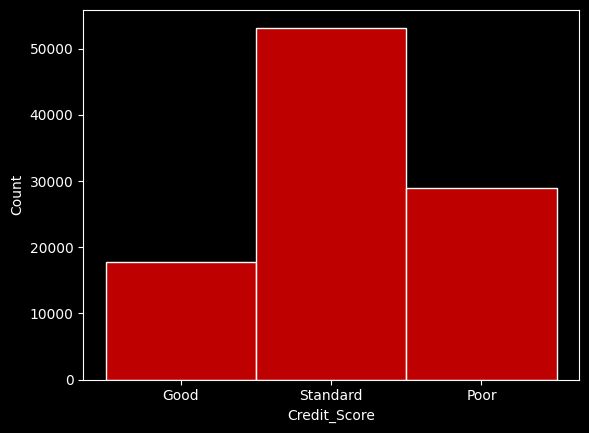

In [15]:
sns.histplot(df, x='Credit_Score', color='r')
plt.show()

Since standard is like a intermediate between good and poor like something neutral; this could be expected. But here we also have 
good count < poor count.

#### Occupation

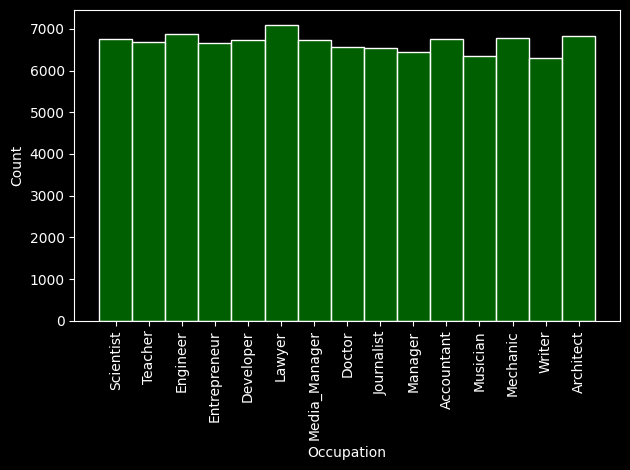

In [ ]:
sns.histplot(df, x='Occupation',color='g')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

This looks balanced, we have similar number of customers for each occupation, this was bit suprising.

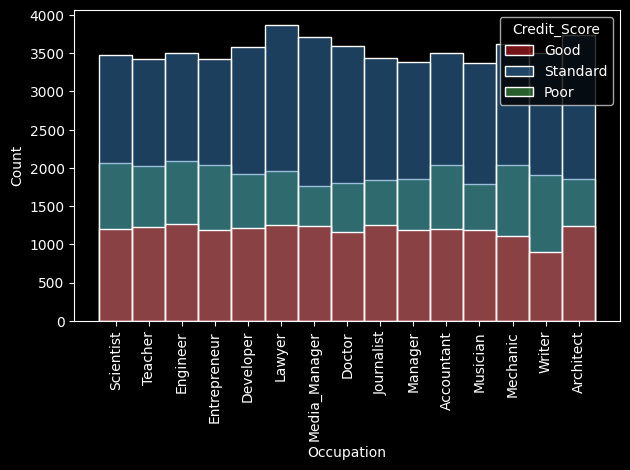

In [32]:
sns.histplot(df, x='Occupation',hue ='Credit_Score',color='r',palette='Set1')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

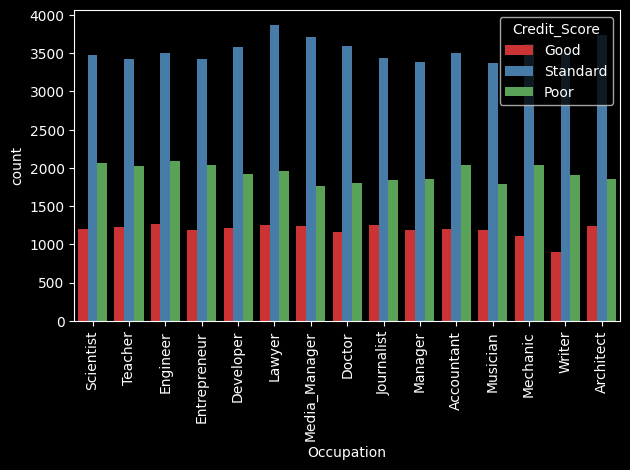

In [34]:
sns.countplot(df, x='Occupation',hue ='Credit_Score',palette='Set1')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Here also we can see, a similar trend for all the Occupation. We might also try to drop; since it does't have of much of variation.

#### Credit_Mix

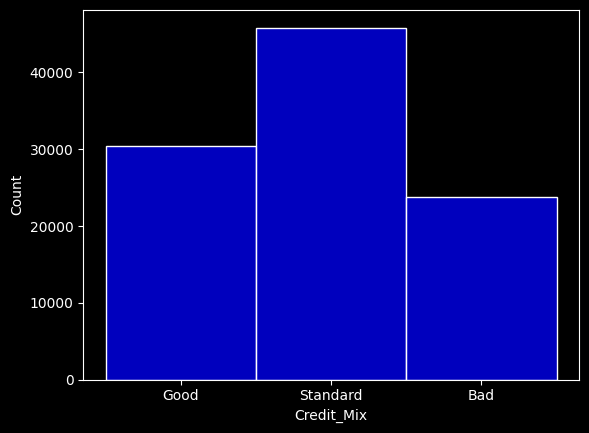

In [16]:
sns.histplot(df, x='Credit_Mix', color='b')
plt.show()

I need to understand first, what is this label credit_mix

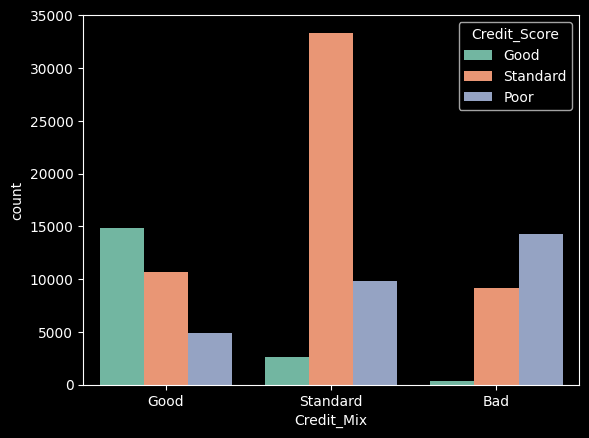

In [35]:
sns.countplot(df, x='Credit_Mix', hue='Credit_Score',palette='Set2')
plt.show()

#### Payment_of_Min_Amount

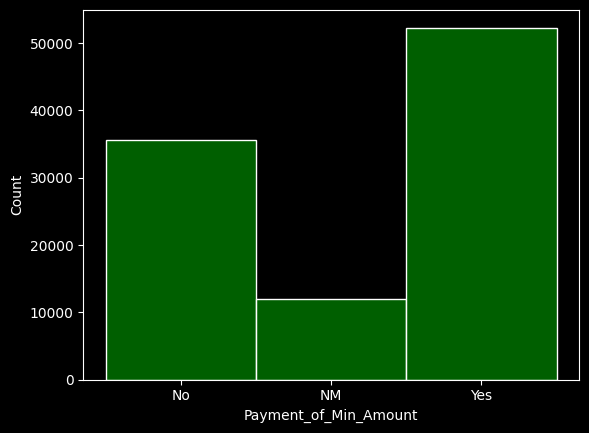

In [19]:
sns.histplot(df, x='Payment_of_Min_Amount', color='g')
plt.show()

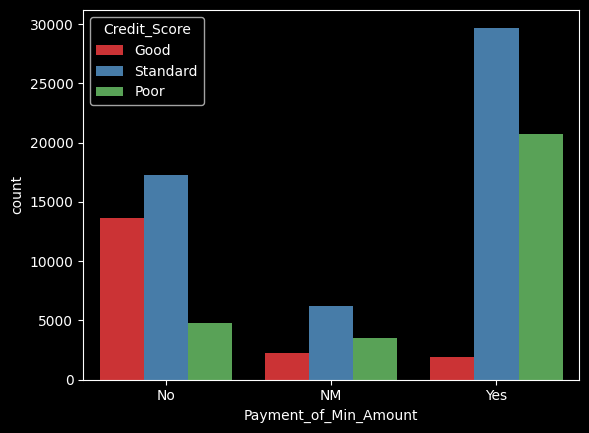

In [37]:
sns.countplot(df, x='Payment_of_Min_Amount', hue='Credit_Score',palette='Set1')
plt.show()

#### Payment_Behaviour 

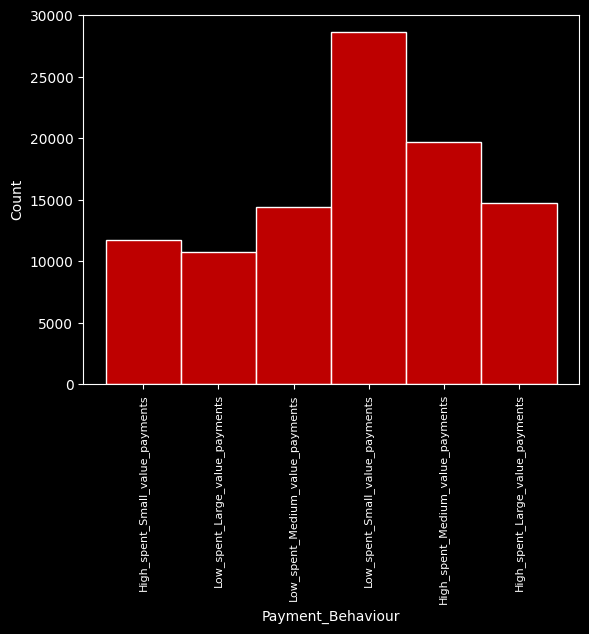

In [24]:
sns.histplot(df, x='Payment_Behaviour', color ='r')
plt.xticks(rotation = 90,size=8)
plt.show()

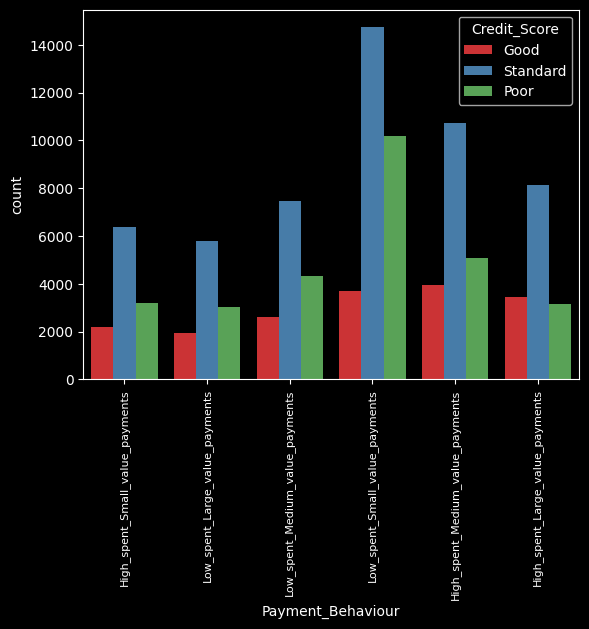

In [38]:
sns.countplot(df, x='Payment_Behaviour', hue='Credit_Score', palette='Set1')
plt.xticks(rotation = 90,size=8)
plt.show()

### Numerical Features

#### Monthly Balance

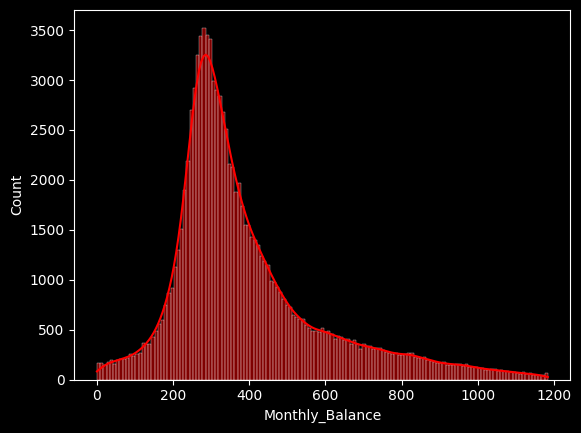

In [102]:
sns.histplot(df['Monthly_Balance'],kde=True,color='r')
plt.show()

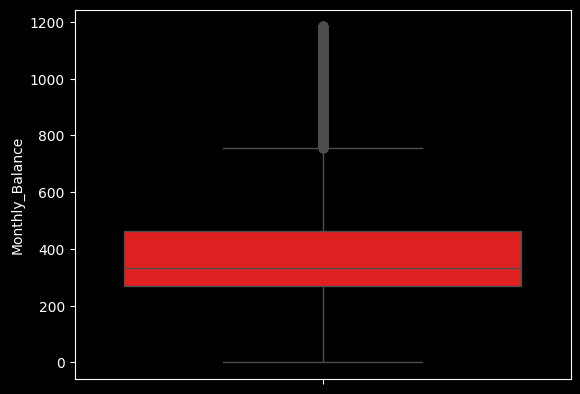

In [103]:
sns.boxplot(df['Monthly_Balance'],color='r')
plt.show()

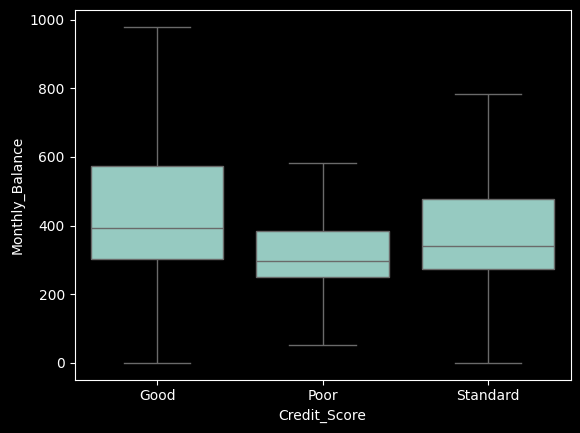

In [5]:
sns.boxplot(data = df, x='Credit_Score', y= 'Monthly_Balance',showfliers=False)
plt.show()

The median of poor is lowest and highest for good. We can see similar relation for interquartile range.

#### Age

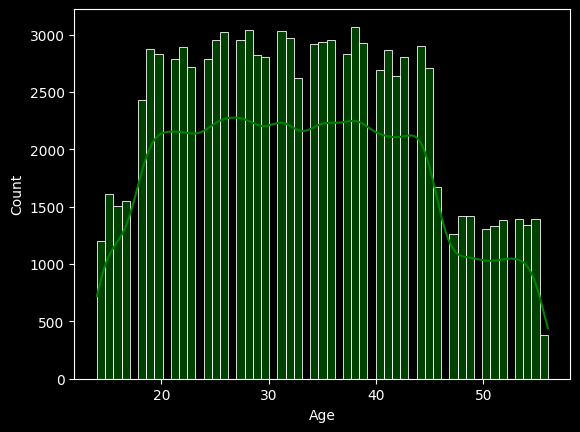

In [104]:
sns.histplot(df['Age'],kde=True,color = 'g')
plt.show()

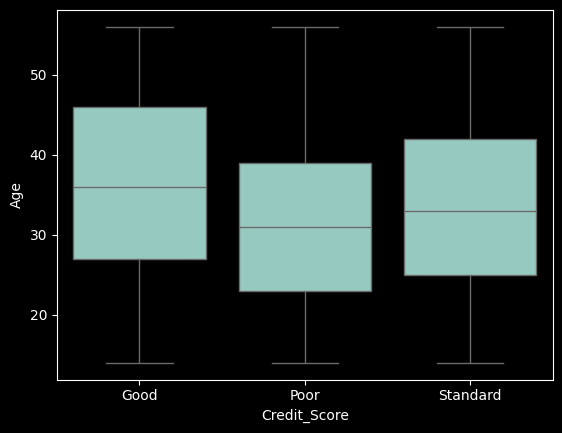

In [6]:
sns.boxplot(data = df, x='Credit_Score', y= 'Age',showfliers=False)
plt.show()

Age seems to have some impace on Credit_Score, median of poor credit_score is lower as compared to standard which is lower to good.

#### SSN 

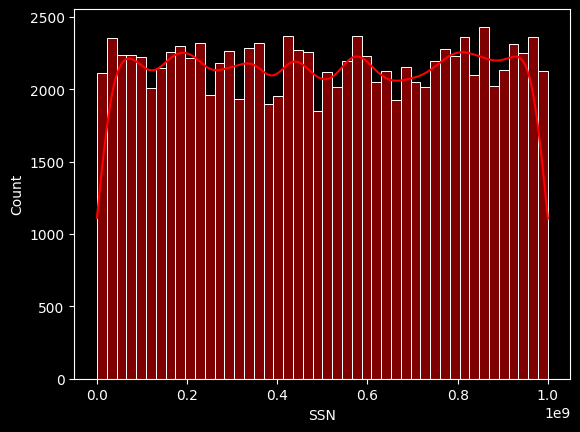

In [106]:
sns.histplot(df['SSN'],kde=True,color = 'r')
plt.show()

#### Annual_Income and Monthly_Inhand_Salary 

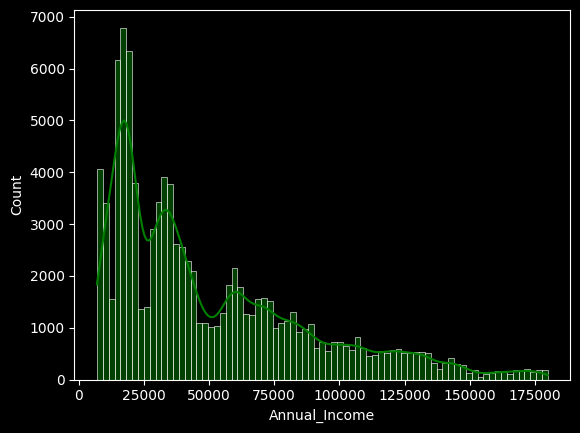

In [107]:
sns.histplot(df['Annual_Income'],kde=True,color = 'g')
plt.show()

we need to handle the skewness

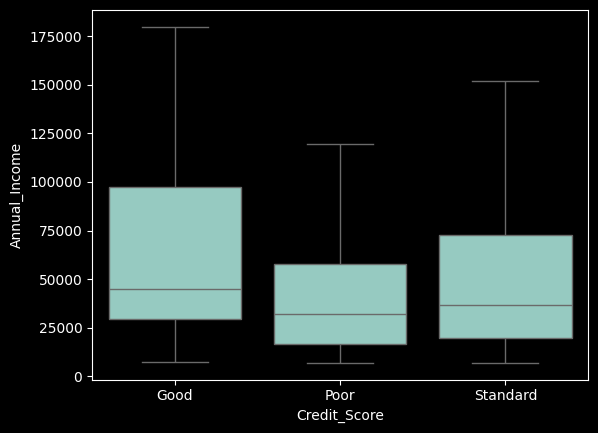

In [7]:
sns.boxplot(data = df, x='Credit_Score', y= 'Annual_Income',showfliers=False)
plt.show()

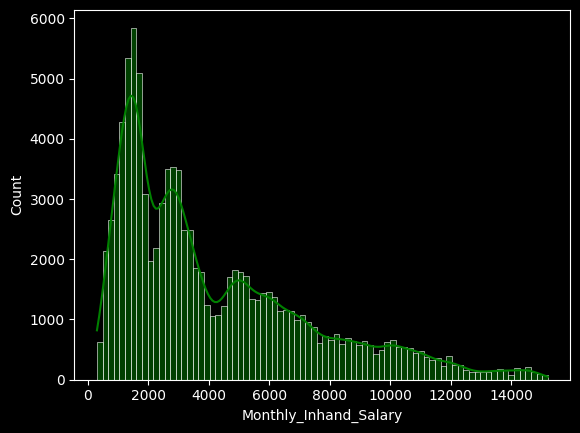

In [108]:
sns.histplot(df['Monthly_Inhand_Salary'],kde=True,color = 'g')
plt.show()

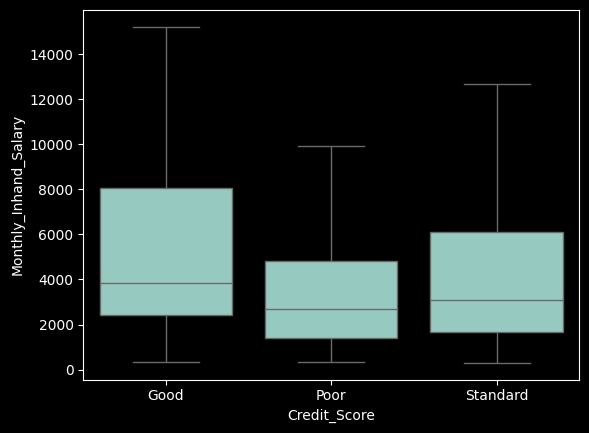

In [8]:
sns.boxplot(data = df, x='Credit_Score', y= 'Monthly_Inhand_Salary',showfliers=False)
plt.show()

#### Num_Bank_Accounts, Num_Credit_Card, Num_of_Loan, Num_of_Delayed_Payment and Num_Credit_Inquiries

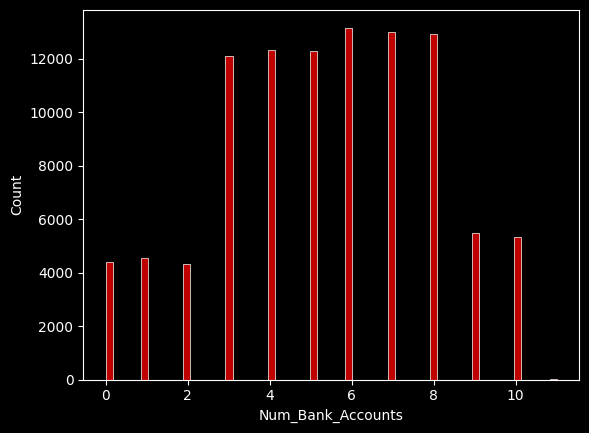

In [109]:
sns.histplot(df['Num_Bank_Accounts'],color = 'r')
plt.show()

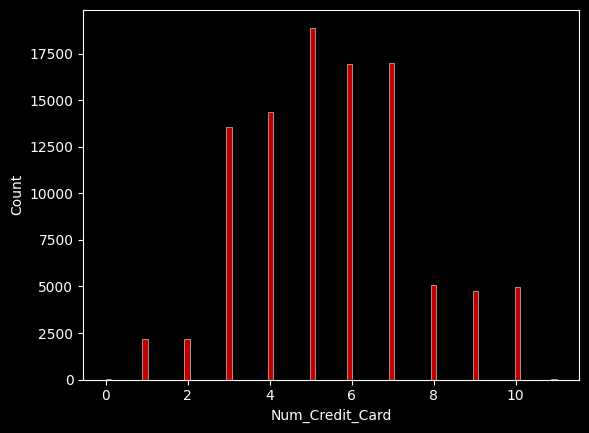

In [110]:
sns.histplot(df['Num_Credit_Card'],color = 'r')
plt.show()

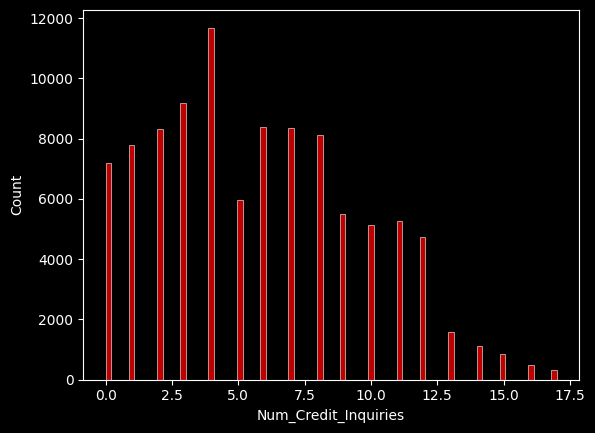

In [111]:
sns.histplot(df['Num_Credit_Inquiries'],color = 'r')
plt.show()

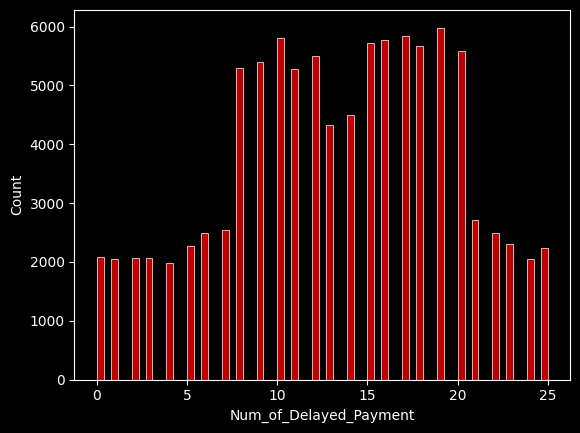

In [112]:
sns.histplot(df['Num_of_Delayed_Payment'],color = 'r')
plt.show()

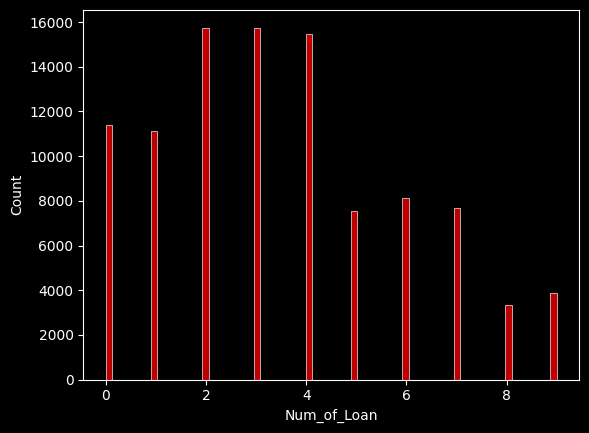

In [113]:
sns.histplot(df['Num_of_Loan'],color = 'r')
plt.show()

#### Interest_Rate, Delay_from_due_date and Changed_Credit_Limit 

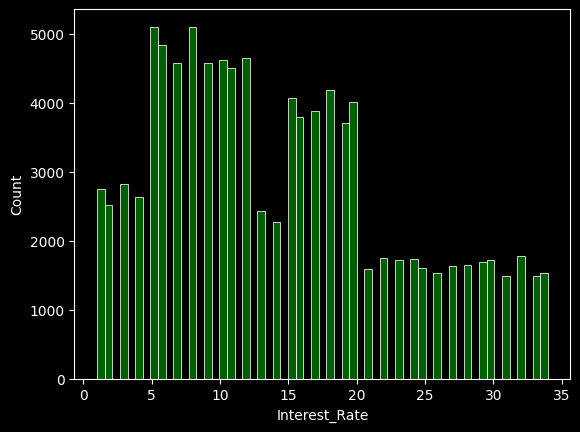

In [114]:
sns.histplot(df['Interest_Rate'],color = 'g')
plt.show()

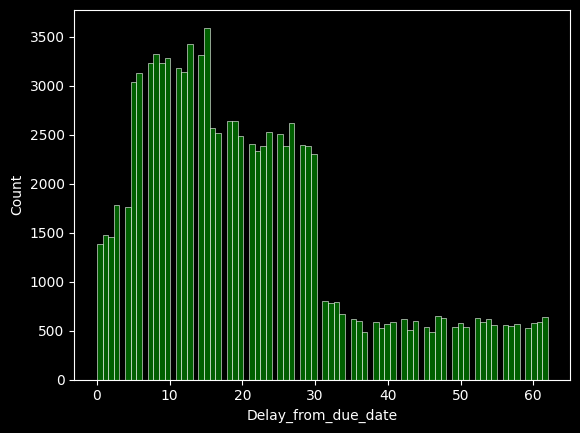

In [115]:
sns.histplot(df['Delay_from_due_date'],color = 'g')
plt.show()

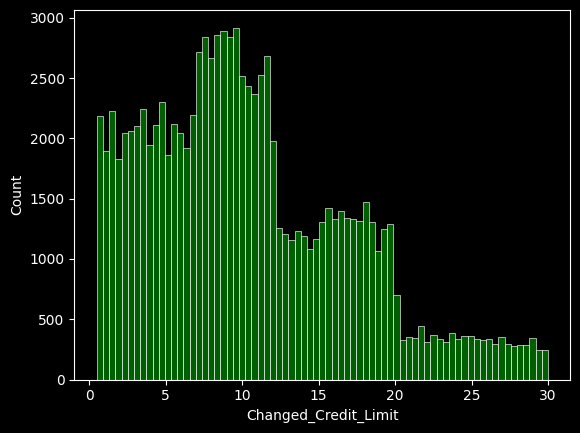

In [116]:
sns.histplot(df['Changed_Credit_Limit'],color = 'g')
plt.show()

#### Outstanding_Debt, Credit_Utilization_Ratio and Credit_History_Age

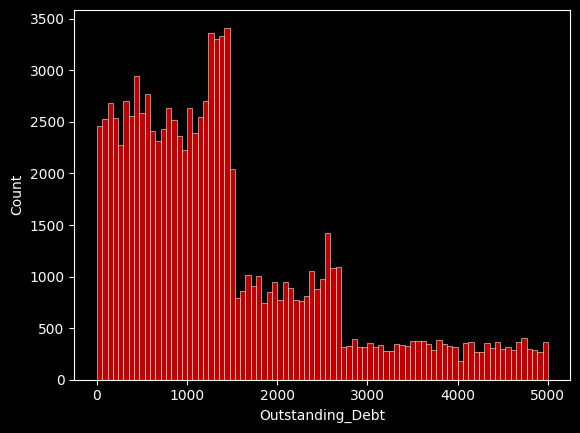

In [117]:
sns.histplot(df['Outstanding_Debt'],color = 'r')
plt.show()

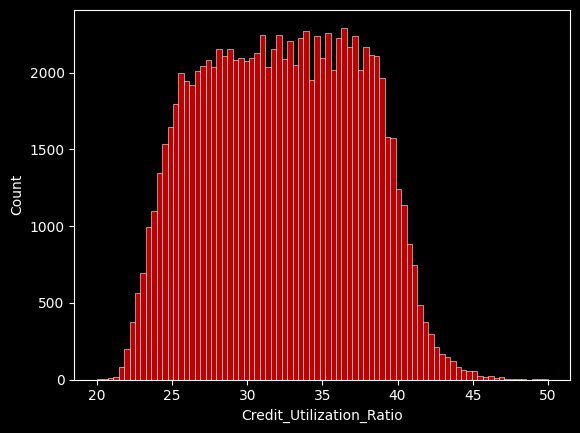

In [118]:
sns.histplot(df['Credit_Utilization_Ratio'],color = 'r')
plt.show()

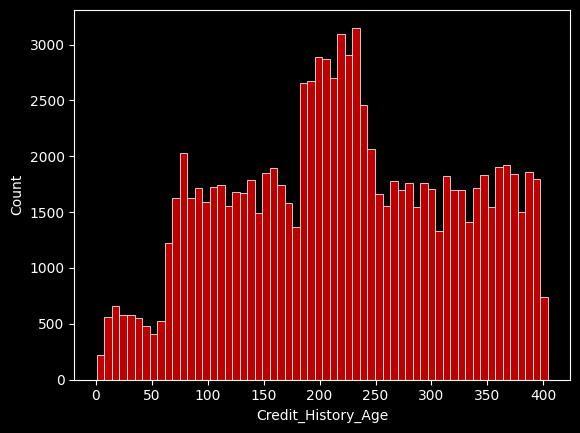

In [119]:
sns.histplot(df['Credit_History_Age'],color = 'r')
plt.show()

#### Total_EMI_per_month and Amount_invested_monthly

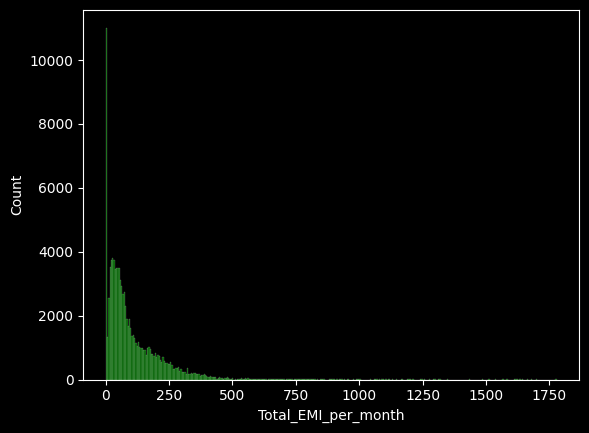

In [120]:
sns.histplot(df['Total_EMI_per_month'],color = 'g')
plt.show()

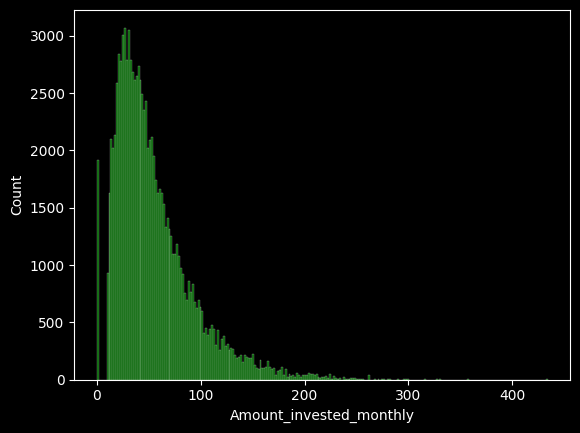

In [121]:
sns.histplot(df['Amount_invested_monthly'],color = 'g')
plt.show()

# Dataset Preparation 

Prepare X and y Variable

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [2]:
import pandas as pd
df = pd.read_parquet("cleaned_dataset.parquet")

In [3]:
X= df.drop(columns=['Credit_Score'],axis=1)
y = df['Credit_Score']

In [4]:
y[:10]

0        Good
1        Good
2        Good
3        Good
4        Good
5        Good
6        Good
7    Standard
8    Standard
9        Good
Name: Credit_Score, dtype: category
Categories (3, object): ['Good', 'Poor', 'Standard']

In [5]:
# create a map for label
mapping = {'Poor':0, 'Standard':1, 'Good':2}

# apply it to Y or labels
y = y.map(mapping)

In [6]:
y[:10]

0    2
1    2
2    2
3    2
4    2
5    2
6    2
7    1
8    1
9    2
Name: Credit_Score, dtype: category
Categories (3, int64): [2, 0, 1]

In [7]:
X.columns

Index(['Customer_ID', 'Month', 'Age', 'SSN', 'Occupation', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   Customer_ID               100000 non-null  int32   
 1   Month                     100000 non-null  int8    
 2   Age                       100000 non-null  int8    
 3   SSN                       100000 non-null  float32 
 4   Occupation                100000 non-null  category
 5   Annual_Income             100000 non-null  float32 
 6   Monthly_Inhand_Salary     100000 non-null  float16 
 7   Num_Bank_Accounts         100000 non-null  float16 
 8   Num_Credit_Card           100000 non-null  float16 
 9   Interest_Rate             100000 non-null  float16 
 10  Num_of_Loan               100000 non-null  float16 
 11  Delay_from_due_date       100000 non-null  float16 
 12  Num_of_Delayed_Payment    100000 non-null  float16 
 13  Changed_Credit_Limit      1000

In [9]:
feature_names = X.columns.tolist()

In [10]:
X_num_features = [feature for feature in X.columns if X[feature].dtype != 'category' ]
X_cat_features = [feature for feature in X.columns if X[feature].dtype == 'category']

preprocessor = ColumnTransformer(
    transformers=[
        ('Ordinal Encoding', OrdinalEncoder() , X_cat_features),
        ('Standard Scaler', StandardScaler(), X_num_features)
    ]
)

In [11]:
preprocessor

ColumnTransformer(transformers=[('Ordinal Encoding', OrdinalEncoder(),
                                 ['Occupation', 'Credit_Mix',
                                  'Payment_of_Min_Amount',
                                  'Payment_Behaviour']),
                                ('Standard Scaler', StandardScaler(),
                                 ['Customer_ID', 'Month', 'Age', 'SSN',
                                  'Annual_Income', 'Monthly_Inhand_Salary',
                                  'Num_Bank_Accounts', 'Num_Credit_Card',
                                  'Interest_Rate', 'Num_of_Loan',
                                  'Delay_from_due_date',
                                  'Num_of_Delayed_Payment',
                                  'Changed_Credit_Limit',
                                  'Num_Credit_Inquiries', 'Outstanding_Debt',
                                  'Credit_Utilization_Ratio',
                                  'Credit_History_Age', 'Total_EMI_per_month',
                                  'Amount_invested_monthly',
                                  'Monthly_Balance'])])

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2, stratify=y)
X_train.shape, X_test.shape

((80000, 24), (20000, 24))

In [13]:
# apply transformation
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [14]:
X_test

array([[ 1.10000000e+01,  0.00000000e+00,  2.00000000e+00, ...,
        -4.70188663e-01, -5.91035896e-01, -5.80695613e-01],
       [ 1.30000000e+01,  1.00000000e+00,  1.00000000e+00, ...,
        -1.05244438e-02, -2.13798926e-01,  1.39756877e+00],
       [ 1.30000000e+01,  2.00000000e+00,  2.00000000e+00, ...,
         9.20095644e-01, -5.55512134e-02,  1.75407941e-01],
       ...,
       [ 1.10000000e+01,  2.00000000e+00,  2.00000000e+00, ...,
        -8.13172507e-01, -4.14405874e-01,  7.82769812e-01],
       [ 2.00000000e+00,  0.00000000e+00,  2.00000000e+00, ...,
         9.81258744e-01,  2.31372669e-01,  8.91847046e-01],
       [ 8.00000000e+00,  2.00000000e+00,  2.00000000e+00, ...,
        -3.59154113e-01, -9.52687865e-01, -4.40630529e-01]],
      shape=(20000, 24))

In [15]:
y_test

29322    1
23872    1
59885    0
54432    1
47864    0
        ..
13701    1
9600     2
98795    1
95452    1
53738    1
Name: Credit_Score, Length: 20000, dtype: category
Categories (3, int64): [2, 0, 1]

# Model Training and Testing

In [181]:
%pip install xgboost catboost -q

Note: you may need to restart the kernel to use updated packages.


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt

In [179]:
# 1. Logistic Regression
lr = LogisticRegression(max_iter=2000,solver='lbfgs' ,random_state=42, class_weight='balanced',verbose=1)
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
print("Accuracy Score" , accuracy_score(y_pred_lr, y_test))
print("Balanced_Accuracy Score" , balanced_accuracy_score(y_pred_lr, y_test))
print("Classification Report" , classification_report(y_pred_lr, y_test))


Accuracy Score 0.65135
Balanced_Accuracy Score 0.6371764956636884
Classification Report               precision    recall  f1-score   support

           0       0.67      0.62      0.65      6248
           1       0.58      0.79      0.67      7792
           2       0.83      0.50      0.62      5960

    accuracy                           0.65     20000
   macro avg       0.69      0.64      0.65     20000
weighted avg       0.68      0.65      0.65     20000



[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.1s finished


In [17]:
# 2. Random Forest
rf = RandomForestClassifier(n_estimators=100,random_state=42,class_weight='balanced',verbose=1)  # 100 is by default
rf.fit(X_train,y_train)
y_pred_lr = rf.predict(X_test)
print("Accuracy Score" , accuracy_score(y_pred_lr, y_test))
print("Balanced_Accuracy Score" , balanced_accuracy_score(y_pred_lr, y_test))
print("Classification Report" , classification_report(y_pred_lr, y_test))

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   21.9s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   44.3s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s


Accuracy Score 0.83595
Balanced_Accuracy Score 0.8284770241832953
Classification Report               precision    recall  f1-score   support

           0       0.86      0.82      0.84      6091
           1       0.84      0.85      0.85     10405
           2       0.80      0.81      0.81      3504

    accuracy                           0.84     20000
   macro avg       0.83      0.83      0.83     20000
weighted avg       0.84      0.84      0.84     20000



[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished


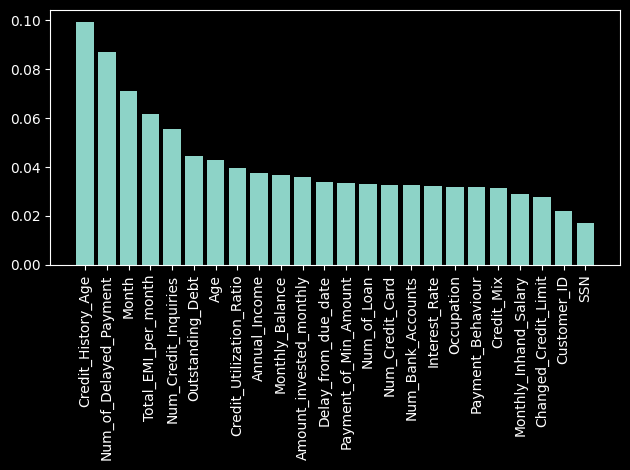

In [27]:
rf_importances = rf.feature_importances_
indices_rf = np.argsort(rf_importances)[::-1]

plt.bar(range(len(rf_importances)), np.array(rf_importances)[indices_rf])
plt.xticks(range(len(rf_importances)), np.array(feature_names)[indices_rf], rotation=90)
plt.tight_layout()
plt.show()

In [21]:
# 3. XGBOOST
xg = XGBClassifier(verbose=1)  
xg.fit(X_train,y_train)
y_pred_lr = xg.predict(X_test)
print("Accuracy Score" , accuracy_score(y_pred_lr, y_test))
print("Balanced_Accuracy Score" , balanced_accuracy_score(y_pred_lr, y_test))
print("Classification Report" , classification_report(y_pred_lr, y_test))

Accuracy Score 0.7946
Balanced_Accuracy Score 0.7817298294292345
Classification Report               precision    recall  f1-score   support

           0       0.78      0.79      0.78      5783
           1       0.81      0.82      0.81     10504
           2       0.77      0.74      0.76      3713

    accuracy                           0.79     20000
   macro avg       0.79      0.78      0.78     20000
weighted avg       0.79      0.79      0.79     20000



In [24]:
# 4. Catboost
cboost = CatBoostClassifier(verbose=0)  #check verbose = 1
cboost.fit(X_train,y_train)
y_pred_lr = cboost.predict(X_test)
print("Accuracy Score" , accuracy_score(y_pred_lr, y_test))
print("Balanced_Accuracy Score" , balanced_accuracy_score(y_pred_lr, y_test))
print("Classification Report" , classification_report(y_pred_lr, y_test))

Accuracy Score 0.7884
Balanced_Accuracy Score 0.7752999689068986
Classification Report               precision    recall  f1-score   support

           0       0.77      0.78      0.78      5696
           1       0.81      0.81      0.81     10603
           2       0.76      0.73      0.74      3701

    accuracy                           0.79     20000
   macro avg       0.78      0.78      0.78     20000
weighted avg       0.79      0.79      0.79     20000



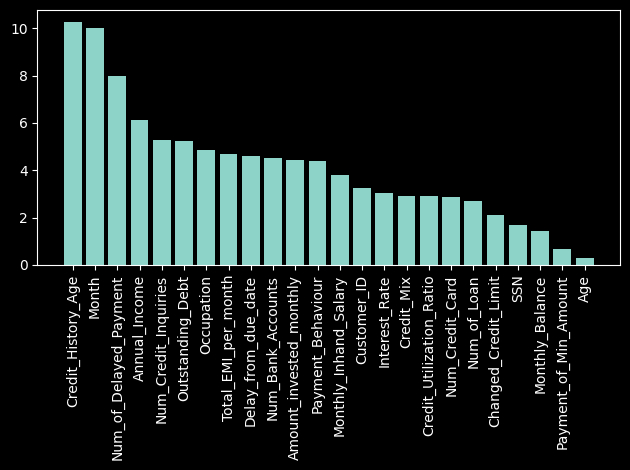

In [38]:
cat_importances = cboost.get_feature_importance()
indices_cat = np.argsort(cat_importances)[::-1]

plt.bar(range(len(cat_importances)), np.array(cat_importances)[indices_cat])
plt.xticks(range(len(cat_importances)), np.array(feature_names)[indices_cat], rotation=90)
plt.tight_layout()
plt.show()

**So far Random Forest has outperformed other models with 83.59 accuracy**

# Model Explainability

***SHAP***

In [39]:
%pip install shap -q

Note: you may need to restart the kernel to use updated packages.


In [18]:
import shap
import matplotlib.pyplot as plt

c:\Users\91809\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [19]:
# Create TreeExplainer for tree-based models
explainer = shap.TreeExplainer(rf)

# Calculate SHAP values for test set
shap_values = explainer.shap_values(X_test[:100])

In [31]:
y_test.shape

(20000,)

In [ ]:
# Actual label of the first test row
actual_label = y_test.iloc[0]

# Predicted label by the model
predicted_label = rf.predict([X_test[0]])[0]

print("Actual label:", actual_label)
print("Predicted label:", predicted_label)

Actual label: 1
Predicted label: 0


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


In [20]:
shap_values.shape

(100, 24, 3)

In [21]:
import pandas as pd
df_sample = pd.read_parquet('cleaned_dataset.parquet')
df_sample = df_sample.drop('Credit_Score',axis =1)
X_sample = pd.DataFrame(X_test[:100], columns=df_sample.columns)
print(X_sample.shape)

(100, 24)


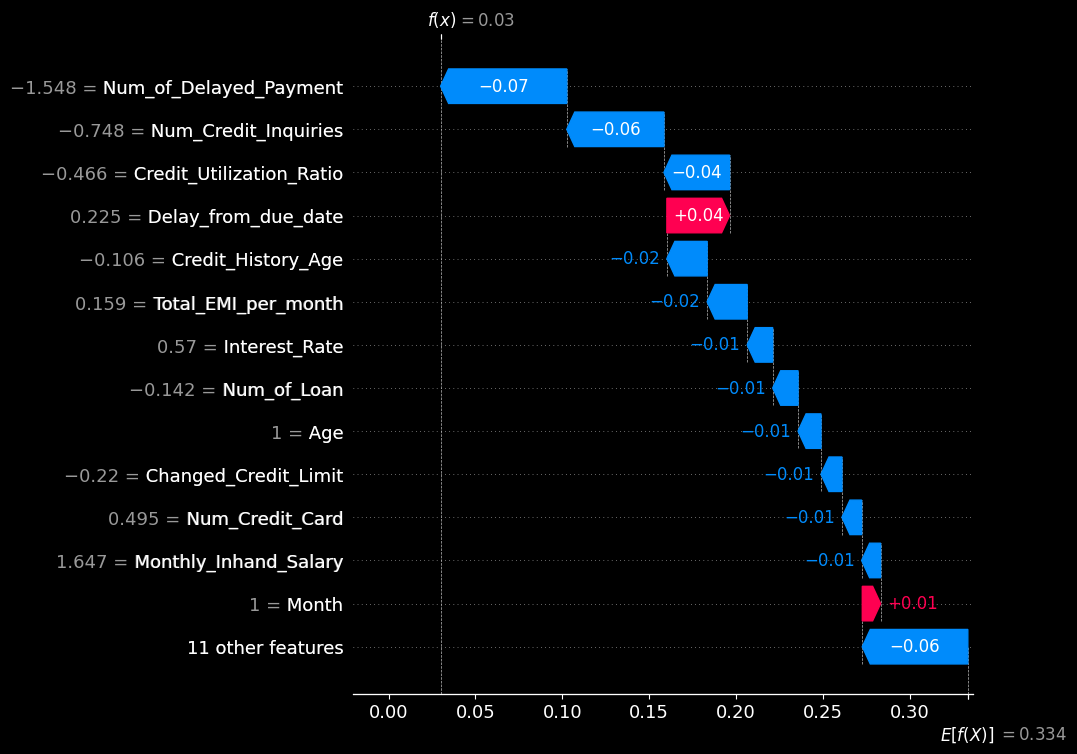

In [25]:
# Sample index
row_idx = 1
class_idx = 0  # Or whichever class you're explaining

# Create the Explanation object
row_expl = shap.Explanation(
    values=shap_values[row_idx, :, class_idx],     # SHAP values for that row & class
    base_values=explainer.expected_value[class_idx],  # Expected value for that class
    data=X_test[row_idx],                     # Actual feature values for the row
    feature_names=df_sample.columns                 # Column names
)

# Now plot the waterfall
shap.plots.waterfall(row_expl, max_display=14)


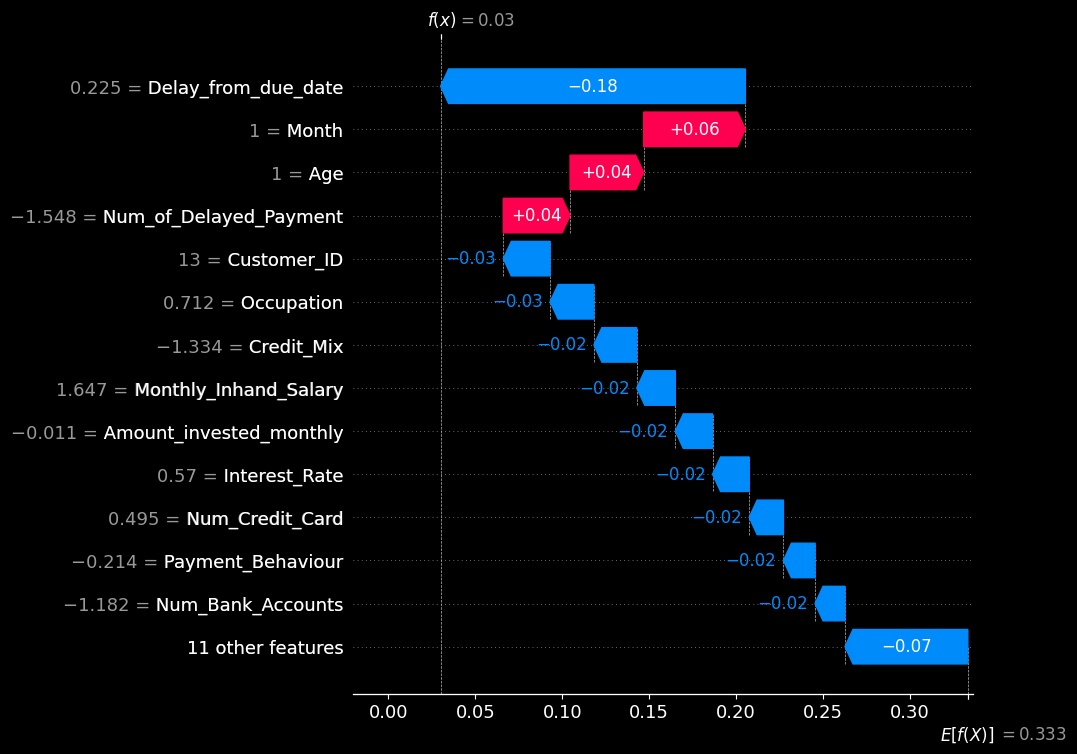

In [27]:
# Sample index
row_idx = 1
class_idx = 2  # Or whichever class you're explaining

# Create the Explanation object
row_expl = shap.Explanation(
    values=shap_values[row_idx, :, class_idx],     # SHAP values for that row & class
    base_values=explainer.expected_value[class_idx],  # Expected value for that class
    data=X_test[row_idx],                     # Actual feature values for the row
    feature_names=df_sample.columns                 # Column names
)

# Now plot the waterfall
shap.plots.waterfall(row_expl, max_display=14)

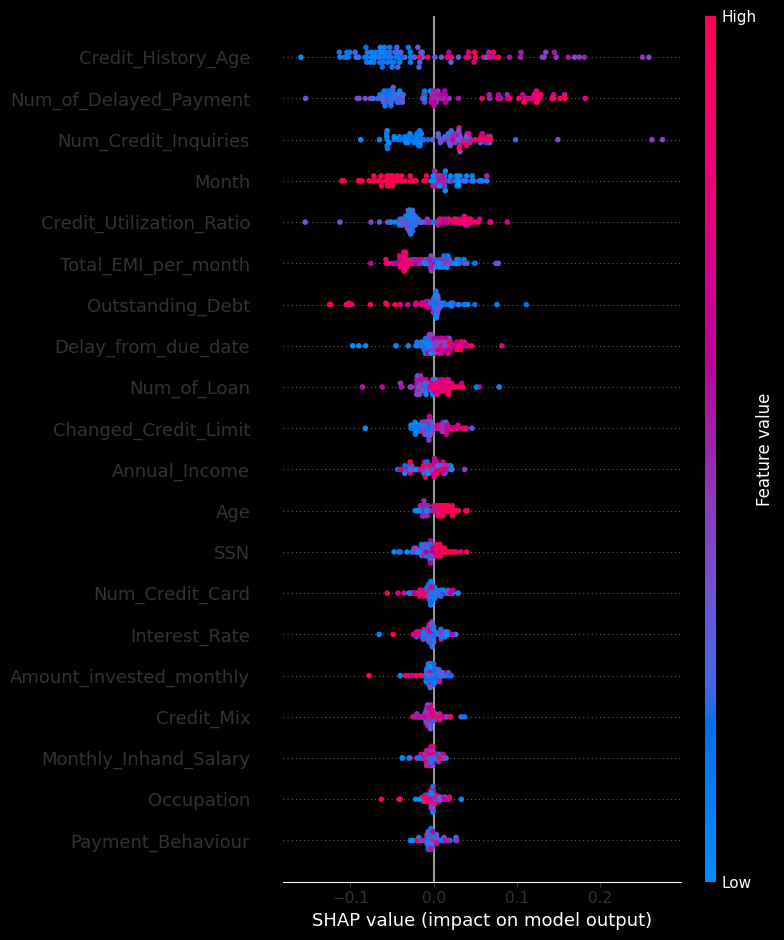

In [62]:
shap.summary_plot(shap_values[:,:,0], X_sample)    # only works for binary/multiclass with correct shape

Poor credit scores are strongly influenced by:

- Low Credit_History_Age

- High number of Delayed Payments

- Frequent Credit Inquiries

- High Outstanding Debt

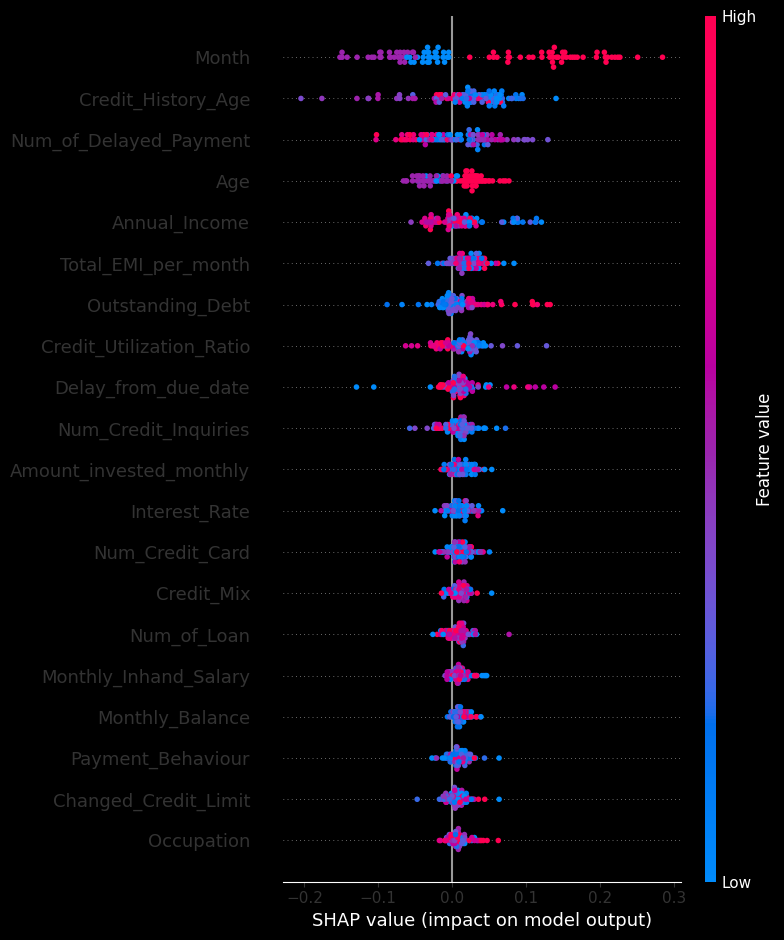

In [36]:
# For multiclass, shap_values is a list (1 for each class)
shap.summary_plot(shap_values[:,:,1], X_sample)  

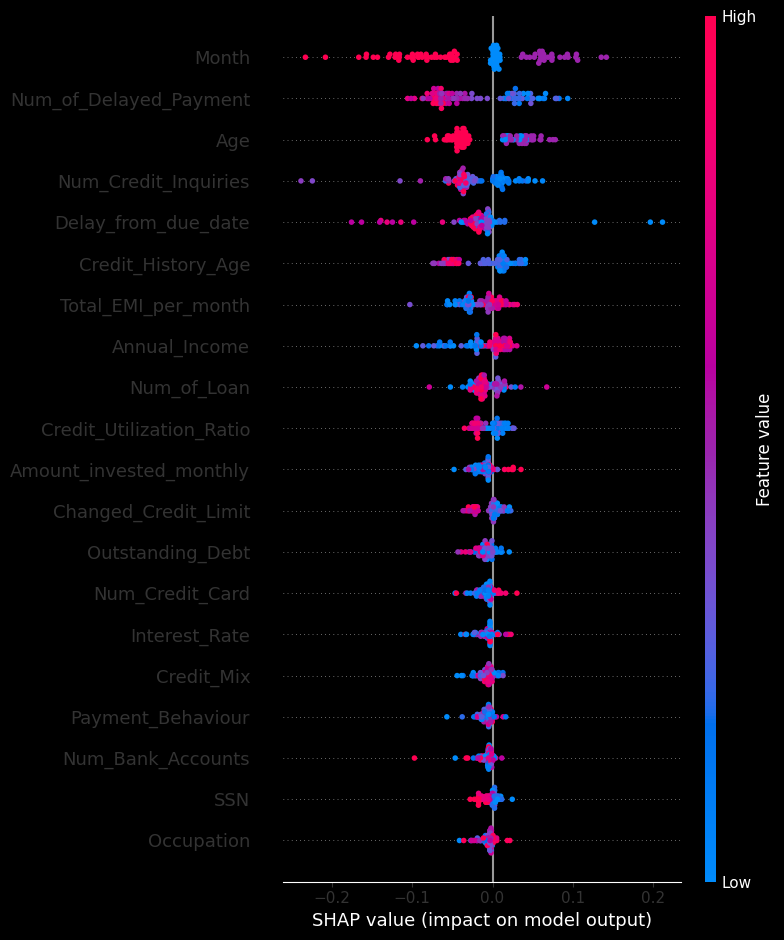

In [64]:
shap.summary_plot(shap_values[:,:,2], X_sample)

Good scores are supported by:

- High Credit History Age

- Low Delay from Due Dates

- Higher Income & Investments

# Insights to Paisabazzar/ Soln to Business Objective

1. Customer Segmentation:

-       Segment users by SHAP-driven features like Credit_History_Age and Num_of_Delayed_Payment to target high-risk groups with tailored financial advice or pre-approval offers.

2. Proactive Interventions:

-       Use SHAP values to create explainable scorecards to guide customers toward credit score improvement, e.g., reducing EMI load or delaying fewer payments.

3. Transparent Recommendations:

-       Integrate local explanations from SHAP into the customer interface for transparent financial decision support. E.g., “Your credit score is likely impacted by high EMI and frequent credit inquiries.”

# Future Work

- Work alongside a domain expert and the person who has collected the dataset
- Experiments with feature selection